# ConvNet

In [ ]:
# Download draw_convnet.py from GitHub
!wget https://raw.githubusercontent.com/gwding/draw_convnet/master/draw_convnet.py

--2024-05-18 07:49:38--  https://raw.githubusercontent.com/gwding/draw_convnet/master/draw_convnet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9248 (9.0K) [text/plain]
Saving to: ‘draw_convnet.py’

draw_convnet.py     100%[===================>]   9.03K  --.-KB/s    in 0s      

2024-05-18 07:49:38 (54.4 MB/s) - ‘draw_convnet.py’ saved [9248/9248]



<ipython-input-2-9d64f8df0f2f>:110: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


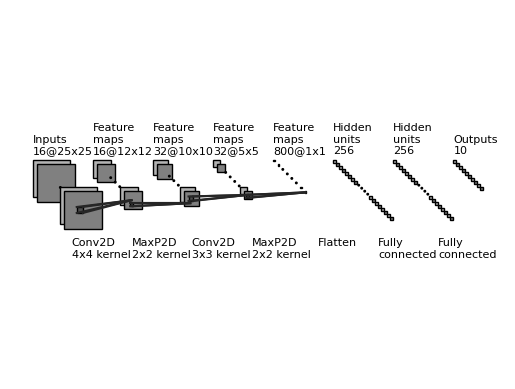

In [ ]:
import draw_convnet
import os
import numpy as np
import matplotlib.pyplot as plt

NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.

fc_unit_size = 2
layer_width = 40
flag_omit = True

patches = []
colors = []

fig, ax = plt.subplots()


############################
# conv layers
size_list = [(25, 25), (12, 12), (10, 10), (5, 5), (1, 1)]
num_list = [16, 16, 32, 32, 800]
x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

for ind in range(len(size_list)-1,-1,-1):
    if flag_omit:
        draw_convnet.add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumConvMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        draw_convnet.add_layer(patches, colors, size=size_list[ind],
                  num=num_show_list[ind],
                  top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    draw_convnet.label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
        num_list[ind], size_list[ind][0], size_list[ind][1]))

############################
# in between layers
start_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
patch_size_list = [(4, 4), (2, 2), (3, 3), (2, 2)]
ind_bgn_list = range(len(patch_size_list))
text_list = ['Conv2D', 'MaxP2D', 'Conv2D', 'MaxP2D']

for ind in range(len(patch_size_list)):
    draw_convnet.add_mapping(
        patches, colors, start_ratio_list[ind], end_ratio_list[ind],
        patch_size_list[ind], ind,
        top_left_list, loc_diff_list, num_show_list, size_list)
    draw_convnet.label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
        patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=[26, -65]
    )


############################
# fully connected layers
size_list = [(fc_unit_size, fc_unit_size)] * 3
num_list = [256, 256, 10]
num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

for ind in range(len(size_list)):
    if flag_omit:
        draw_convnet.add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumFcMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        draw_convnet.add_layer(patches, colors, size=size_list[ind],
                  num=num_show_list[ind],
                  top_left=top_left_list[ind],
                  loc_diff=loc_diff_list[ind])
    draw_convnet.label(top_left_list[ind], text_list[ind] + '\n{}'.format(
        num_list[ind]))

text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

for ind in range(len(size_list)):
    draw_convnet.label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

############################
for patch, color in zip(patches, colors):
    patch.set_color(color * np.ones(3))
    if isinstance(patch, draw_convnet.Line2D):
        ax.add_line(patch)
    else:
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)

plt.tight_layout()
plt.axis('equal')
plt.axis('off')
plt.show()
fig.set_size_inches(8, 2.5)

fig_dir = './'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
            bbox_inches='tight', pad_inches=0)